In [28]:
from sklearn.manifold import TSNE
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [34]:
tsne = TSNE(
    n_components=3, 
    perplexity=100,  # 提高perplexity，增加全局结构的考虑
    learning_rate=200,  # 增加学习率，使其更快速收敛
    n_iter=5000,  # 增加迭代次数，允许更精确的优化
    early_exaggeration=20,  # 增加early_exaggeration，帮助分离
    method='barnes_hut',
    init='pca',
    random_state=66
)
sample_size = 6000

In [30]:
def tsne_visualization(x_train, 
                       y_train, 
                       title,
                       sample_size=sample_size,
                       tsne=tsne
                      ):
    """
    Perform t-SNE visualization on a sample of data.
    """
    # 确保 x_train, y_train 是 NumPy 数组
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    # 采样数据
    if x_train.shape[0] > sample_size:
        idx = np.random.choice(x_train.shape[0], sample_size, replace=False)
        x_train, y_train = x_train[idx], y_train[idx]

    print("Performing t-SNE...")
#     tsne = TSNE(n_components=2, perplexity=30, method='barnes_hut', init='pca', random_state=42)
    x_embedded = tsne.fit_transform(x_train)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=y_train, cmap='jet', alpha=0.5)
    plt.colorbar(scatter, label="Classes")
    plt.title(f"t-SNE Projection of {title}")
    plt.xlabel("t-SNE Axis 1 (Reduced Feature Space)")
    plt.ylabel("t-SNE Axis 2 (Reduced Feature Space)")
    plt.show()

In [32]:
feature_dic = joblib.load(r"C:\Users\81903\Desktop\coursework\thesis\6. repo\IMGRECO\week3-replicate\report\FMNIST\extracted-features\features_fmnist-hand.pkl")

feature_sets = {
#     "LBP Features (Train)": (feature_dic['x_train_lbp'], feature_dic['y_train_lbp']),
#     "LBP Features (Test)": (feature_dic['x_test_lbp'], feature_dic['y_test_lbp']),
    "HOG Features (Train)": (feature_dic['x_train_hog'], feature_dic['y_train_hog']),
#     "HOG Features (Test)": (feature_dic['x_test_hog'], feature_dic['y_test_hog']),
#     "GLCM Features (Train)": (feature_dic['x_train_glcm'], feature_dic['y_train_glcm']),
#     "GLCM Features (Test)": (feature_dic['x_test_glcm'], feature_dic['y_test_glcm']),
#     "ZM Features (Train)": (feature_dic['x_train_zm'], feature_dic['y_train_zm']),
#     "ZM Features (Test)": (feature_dic['x_test_zm'], feature_dic['y_test_zm']),
    "Combined HOG+LBP (Train)": (feature_dic['x_combined_train_hog_lbp'], feature_dic['y_combined_train_hog_lbp']),
#     "Combined HOG+LBP (Test)": (feature_dic['x_combined_test_hog_lbp'], feature_dic['y_combined_test_hog_lbp']),
    "Combined HOG+GLCM (Train)": (feature_dic['x_combined_train_hog_glcm'], feature_dic['y_combined_train_hog_glcm']),
#     "Combined HOG+GLCM (Test)": (feature_dic['x_combined_test_hog_glcm'], feature_dic['y_combined_test_hog_glcm']),
}

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

def tsne_visualization(x_train, 
                       y_train, 
                       title,
                       sample_size=6000,  # 默认样本大小
                       tsne=None  # 使用默认的tsne模型
                      ):
    """
    Perform t-SNE visualization on a sample of data.
    """
    # 确保 x_train, y_train 是 NumPy 数组
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    # 采样数据
    if x_train.shape[0] > sample_size:
        idx = np.random.choice(x_train.shape[0], sample_size, replace=False)
        x_train, y_train = x_train[idx], y_train[idx]

    # 如果没有传入tsne模型，则使用默认的配置
    if tsne is None:
        tsne = TSNE(n_components=3, perplexity=100, learning_rate=200, n_iter=5000, early_exaggeration=20, method='barnes_hut', init='pca', random_state=42)

    print("Performing t-SNE...")
    x_embedded = tsne.fit_transform(x_train)

    # 绘制三维图
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(x_embedded[:, 0], x_embedded[:, 1], x_embedded[:, 2], c=y_train, cmap='jet', alpha=0.5)
    plt.colorbar(scatter, label="Classes")
    ax.set_title(f"t-SNE Projection of {title}")
    ax.set_xlabel("t-SNE Axis 1 (Reduced Feature Space)")
    ax.set_ylabel("t-SNE Axis 2 (Reduced Feature Space)")
    ax.set_zlabel("t-SNE Axis 3 (Reduced Feature Space)")
    plt.show()

Performing t-SNE...


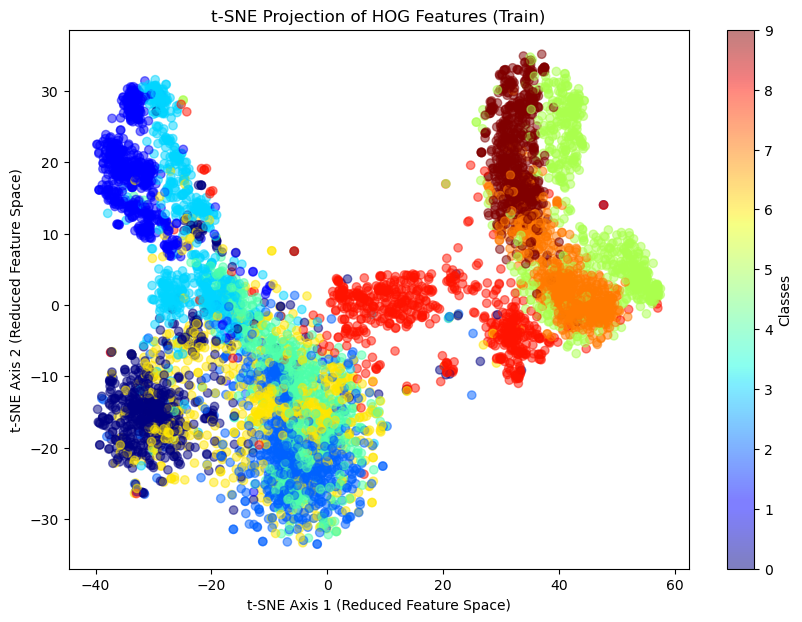

Performing t-SNE...


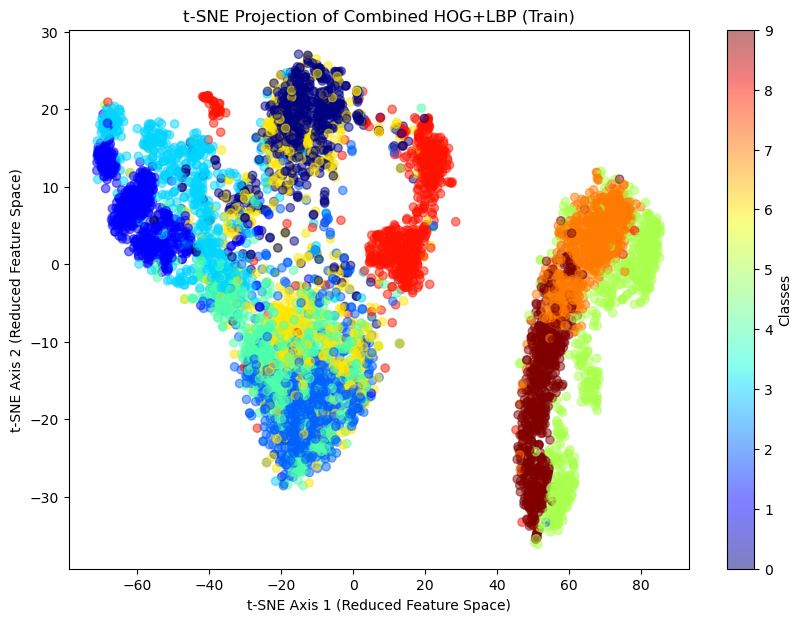

Performing t-SNE...


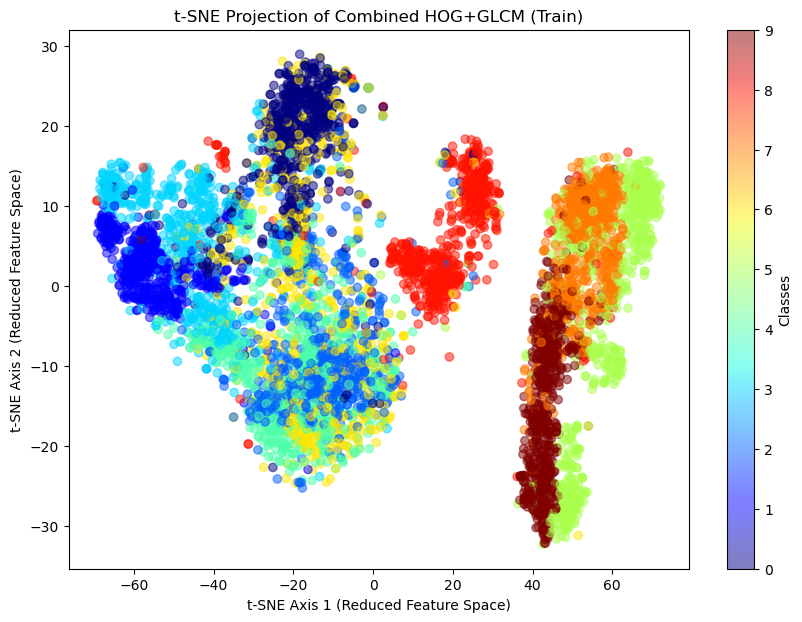

In [33]:
for name, (X, y) in feature_sets.items():
    tsne_visualization(X, y, name)

Performing t-SNE...


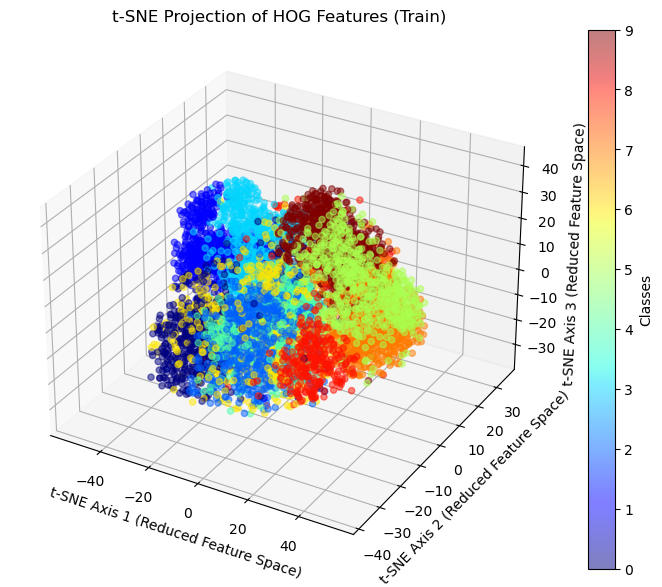

Performing t-SNE...


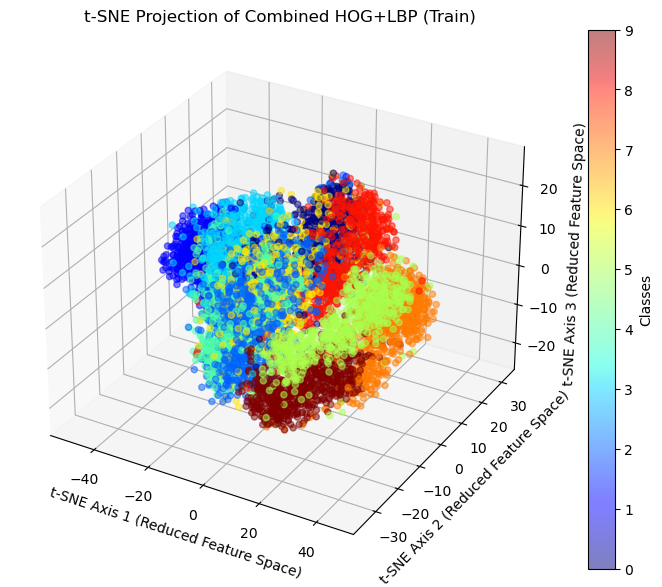

Performing t-SNE...


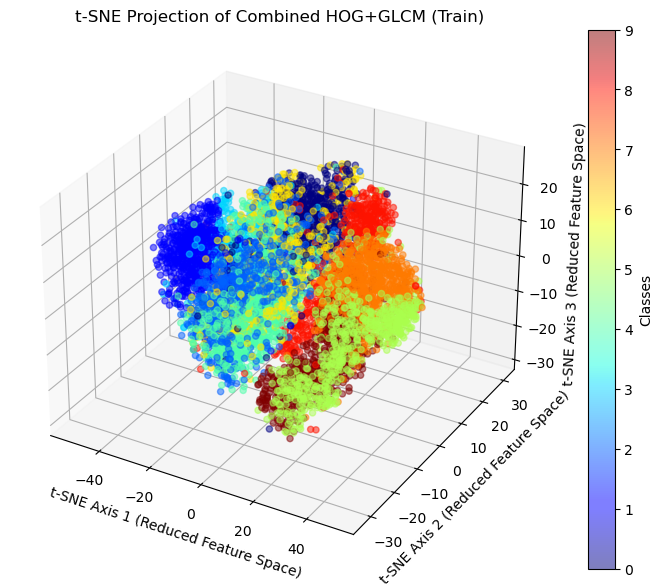

In [37]:
for name, (X, y) in feature_sets.items():
    tsne_visualization(X, y, name)

Performing t-SNE...


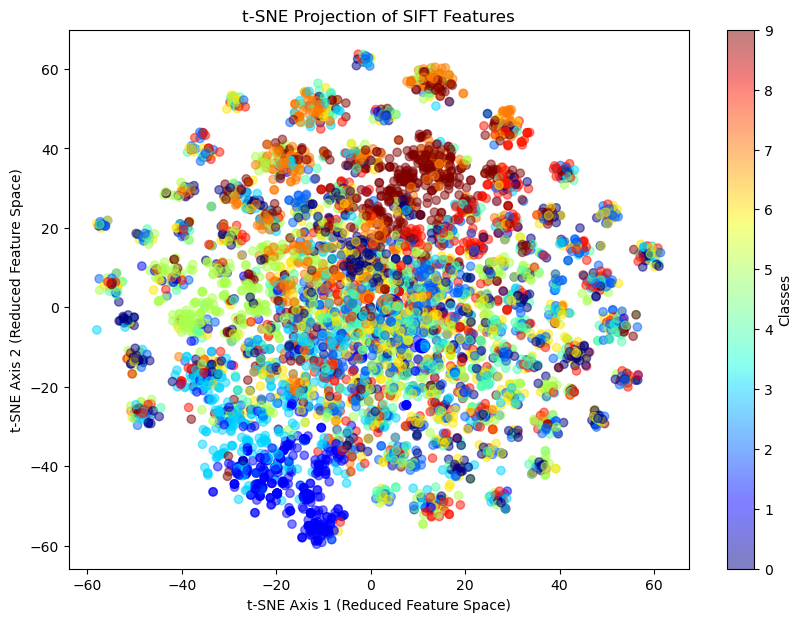

In [21]:
tsne_visualization(feature_dic['x_train_sift'], feature_dic['y_train_sift'], "SIFT Features")

Performing t-SNE...


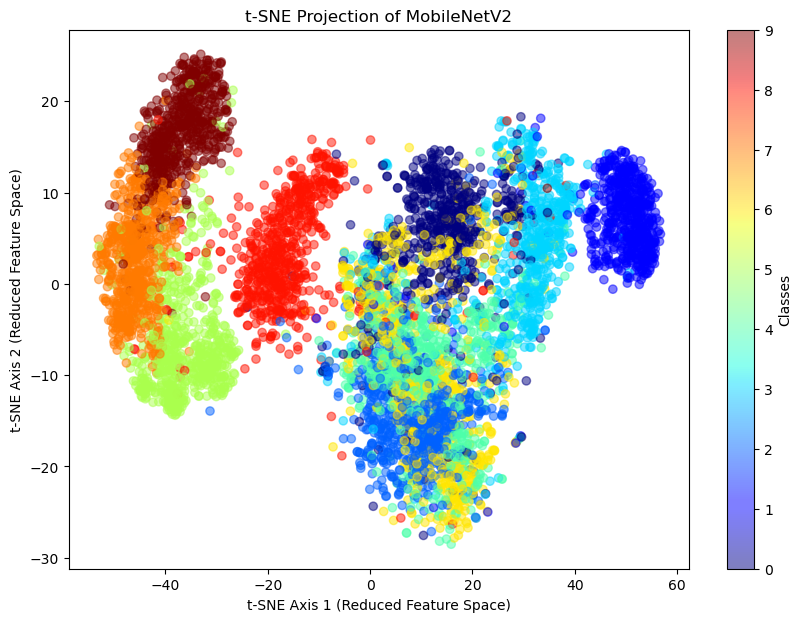

In [27]:
X_train = np.load('./deep-features/train_features-f.npy')
y_train = np.load('./deep-features/train_labels-f.npy')
X_test = np.load('./deep-features/test_features-f.npy')
y_test = np.load('./deep-features/test_labels-f.npy')

# Step 6: Standardize the features (SVM requires features to be standardized)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

tsne_visualization(X_train, y_train, "MobileNetV2")
# feature_sets_deep = {
#     "Deep Features (Train)": (X_train, y_train),
# #     "Deep Features (Test)": (X_test, y_test),
# }

